In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
mnist = tf.keras.datasets.mnist 
(x_train, y_train), (x_test, y_test) = mnist.load_data()

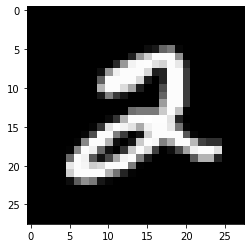

In [3]:
plt.imshow(x_train[5], cmap="gray")
plt.show()

In [4]:
# Normalize the train dataset
x_train = tf.keras.utils.normalize(x_train, axis=1)
# Normalize the test dataset
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [5]:
#Build the model object
model = tf.keras.models.Sequential()
# Add the Flatten Layer
model.add(tf.keras.layers.Flatten())
# Build the input and the hidden layers
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
# Build the output layer
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

In [6]:
# Compile the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [7]:
# train model
model.fit(x=x_train, y=y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 1ms/step - loss: 0.4641 - accuracy: 0.8674
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1098 - accuracy: 0.9663
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0686 - accuracy: 0.9790
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0515 - accuracy: 0.9832
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0361 - accuracy: 0.9881


In [8]:
# Evaluate the model performance
test_loss, test_acc = model.evaluate(x=x_test, y=y_test)
# Print out the model accuracy 
print('\nTest accuracy:', test_acc)

313/313 [==============================] - 0s 838us/step - loss: 0.1045 - accuracy: 0.9703

Test accuracy: 0.970300018787384


In [9]:
predictions = model.predict(x_test) # Make prediction

In [10]:
print(np.argmax(predictions[1000]))

9


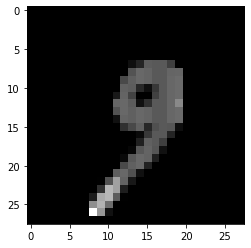

In [11]:
plt.imshow(x_test[1000], cmap="gray")
plt.show()

In [12]:
# keras expects muliple inputs
np.argmax(model.predict(x_test[0:1, :, :]))

7

In [14]:
# if we have only one input
np.argmax(model.predict(np.expand_dims(x_test[0], axis=0)))

7